In [1]:
%config IPCompleter.greedy=True

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from scipy import stats


In [32]:
creditcard_df = pd.read_csv(r"CC GENERAL.csv")

In [33]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [34]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [35]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [36]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


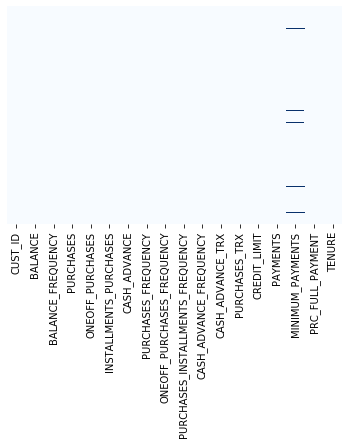

In [37]:
# check for missing values
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [38]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [39]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [40]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

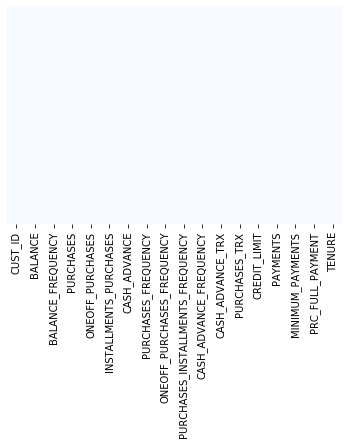

In [41]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [42]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [43]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

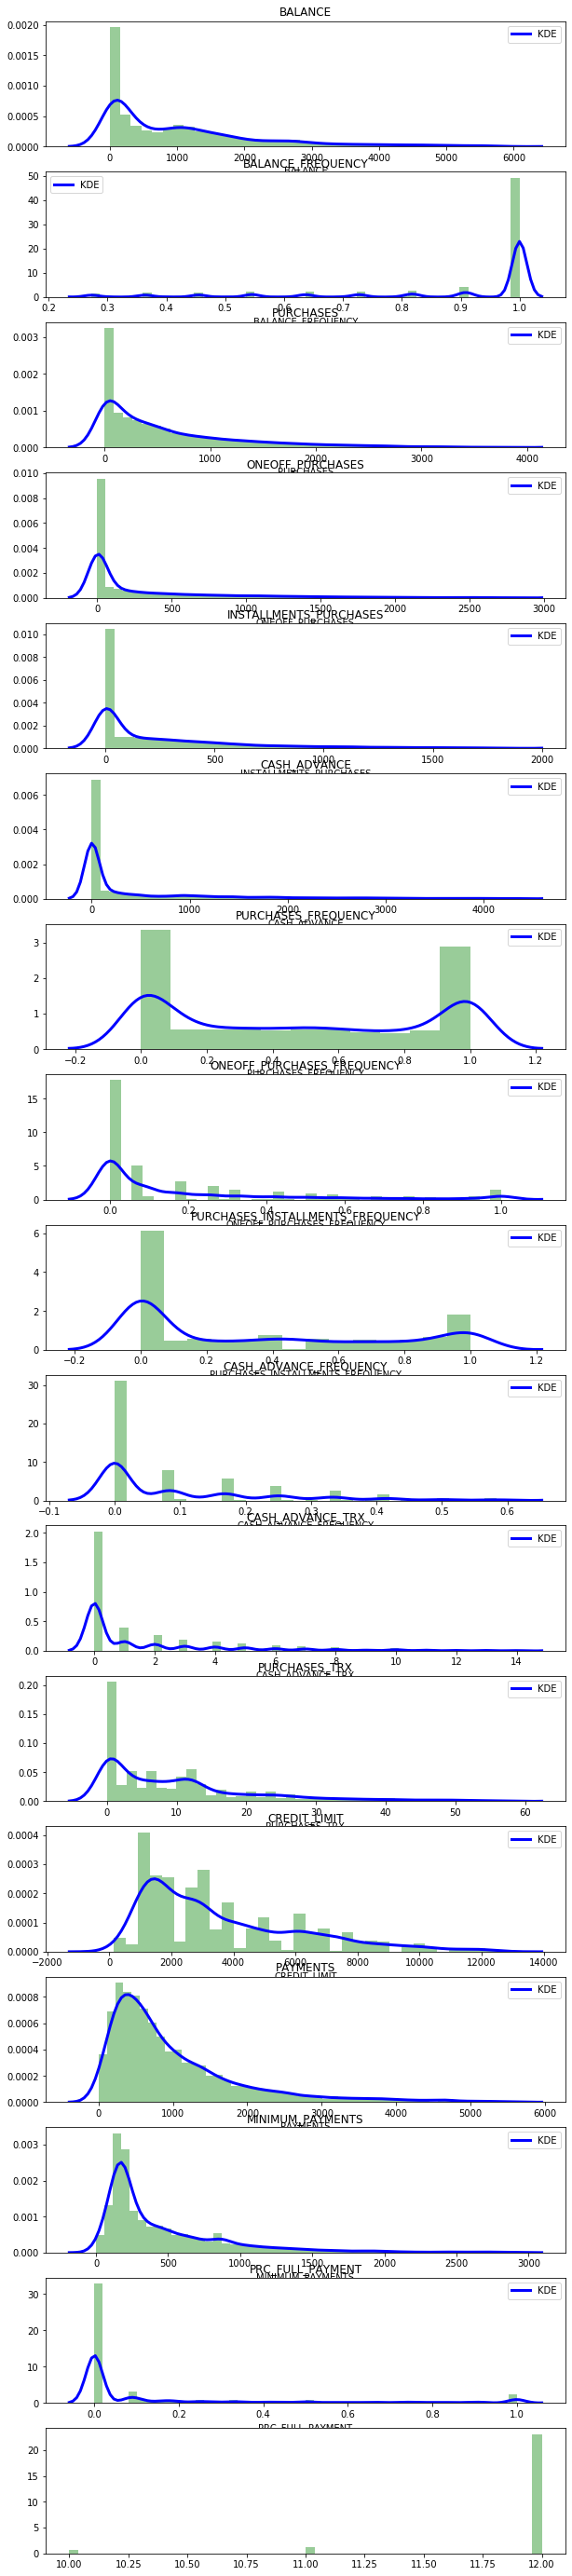

In [75]:
# Univariate analysis

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  print(i)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()


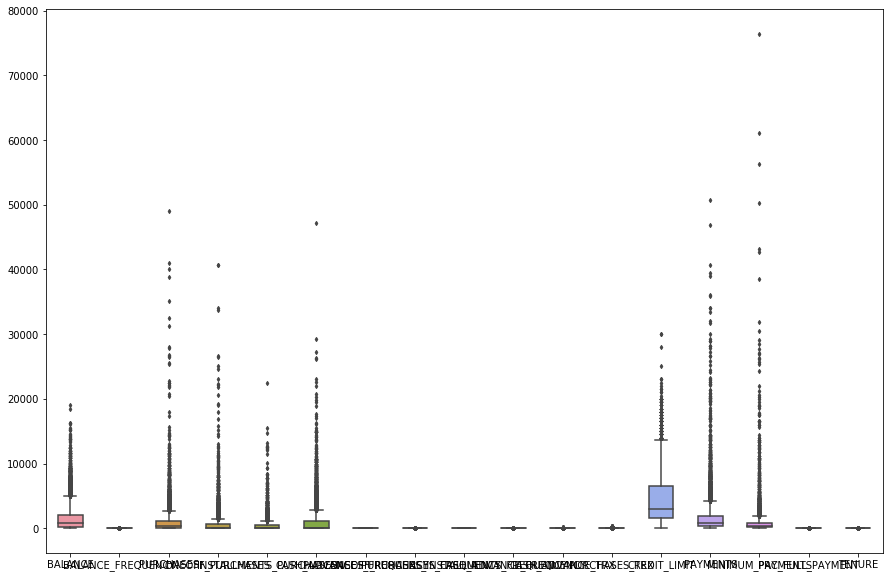

In [45]:
# Check for outliers
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = creditcard_df,width=0.5,ax=ax,fliersize=3)

In [46]:
creditcard_df.shape

(8950, 17)

In [62]:
# Use z scores to remove outliers
z = np.abs(stats.zscore(creditcard_df))
creditcard_df = creditcard_df[(z < 3).all(axis=1)]

In [64]:
correlations = creditcard_df.corr()

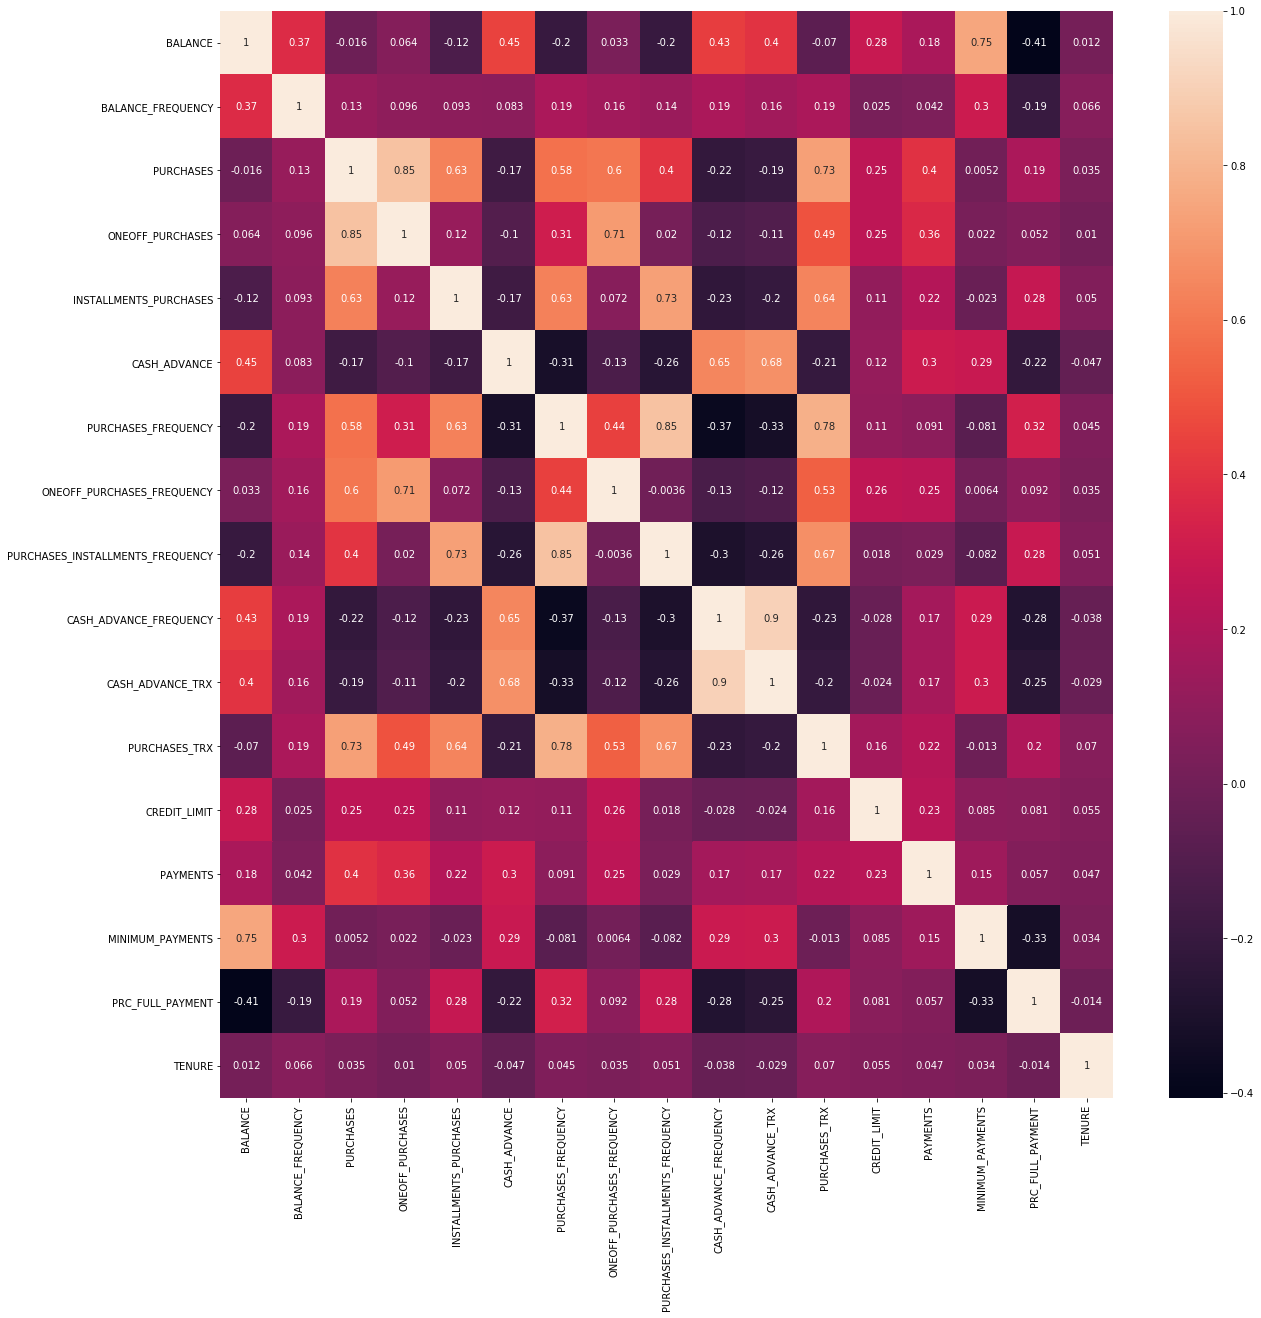

In [65]:
# Visualise correlations

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [66]:
# Let's scale the data before we begin modelling
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [67]:
creditcard_df_scaled.view()


array([[-8.48940945e-01, -4.15125768e-01, -7.08404923e-01, ...,
        -6.98082764e-01, -5.27997626e-01,  2.68023930e-01],
       [ 1.20787827e+00,  5.12831574e-01,  2.73809284e-01, ...,
         3.74601531e-01, -5.27997626e-01,  2.68023930e-01],
       [ 5.13559666e-01, -1.34308311e+00,  1.32567133e+00, ...,
         8.95625048e-01, -5.27997626e-01,  2.68023930e-01],
       ...,
       [-8.78423465e-01,  2.45452574e-03, -7.25751669e-01, ...,
        -8.03374604e-01,  7.86366399e-01, -4.88211802e+00],
       [-8.59519799e-01,  5.12831574e-01, -2.74518895e-01, ...,
        -6.87395749e-01,  2.97697311e+00, -4.88211802e+00],
       [-8.76053274e-01, -2.54943072e+00, -8.46657185e-01, ...,
        -8.48883217e-01,  1.22448774e+00, -4.88211802e+00]])

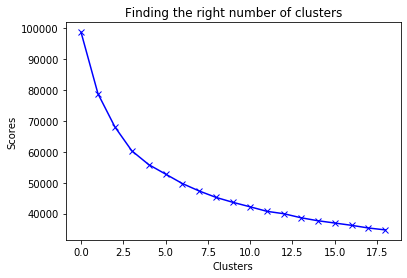

In [68]:
# Obtain optimal number of clusters
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()


In [76]:
# Build the KMeans model
kmeans = KMeans(6)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [78]:
labels


array([1, 2, 2, ..., 4, 4, 3])

In [77]:
kmeans.cluster_centers_.shape

(6, 17)

In [79]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.133836,0.309067,-0.521705,-0.342331,-0.475596,1.650198,-0.728824,-0.361087,-0.588192,1.614469,1.692928,-0.561354,0.257628,0.515770,0.852565,-0.438039,-0.072877
1,0.066549,0.399628,-0.625117,-0.400258,-0.583989,-0.152881,-0.856377,-0.405204,-0.703705,0.020728,-0.090604,-0.695027,-0.340722,-0.362801,-0.005217,-0.469768,0.009042
2,0.027152,0.284156,0.791707,1.313757,-0.442665,-0.405351,0.574881,1.682476,-0.514484,-0.437670,-0.421820,0.413298,0.436116,0.238401,0.012467,0.084395,-0.013507
3,-0.811308,-2.157660,-0.404335,-0.291712,-0.329133,-0.367652,-0.473746,-0.381937,-0.363048,-0.519513,-0.471357,-0.499557,-0.052891,-0.310542,-0.677503,0.450591,-0.058440
4,-0.478050,0.269225,0.067999,-0.459950,0.802162,-0.455652,1.040443,-0.440572,1.277165,-0.525115,-0.483184,0.508185,-0.234593,-0.279641,-0.233446,0.465058,0.014738
5,0.211186,0.389433,2.199388,1.708329,1.612625,-0.182502,1.135542,1.351869,1.088483,-0.196633,-0.198912,1.983782,0.689236,1.064471,0.111011,0.209020,0.168408


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

In [ ]:
labels.shape

In [ ]:
labels.max()

In [ ]:
labels.min()

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(6):
    plt.subplot(1,6,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()
